In [1]:
#Importing the ncessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [2]:
#Reading the data
df=pd.read_csv("Leads.csv")

In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
#checking the missing values
round(100*df.isnull().mean(),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [6]:
#Checking the shape
df.shape

(9240, 37)

In [7]:
#Checking the columns
df.columns[100*df.isnull().mean()>30]

Index(['Tags', 'Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [8]:
cut_off=30
col_to_drop=list(df.columns[100*df.isnull().mean()>cut_off])
len(col_to_drop)

6

In [9]:
# Dropping off the columns which has more null values
df.drop(col_to_drop,axis=1,inplace=True)

In [10]:
#Checking the shape
df.shape

(9240, 31)

In [11]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified


In [12]:
num_col=df.columns[df.nunique()>=30]

In [13]:
num_col

Index(['Prospect ID', 'Lead Number', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Country'],
      dtype='object')

In [14]:
cat_col=df.columns[df.nunique()<30]

In [15]:
cat_col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [16]:
#Divided it into cat_col and num_col based on nunique value to find out the value counts
for i in cat_col:
    print(df[i].value_counts())
    print("-------------------")

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
-------------------
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
-------------------
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64
-------------------
Do Not Call
No     9238
Yes       2
Name: count, dtype: int64
-------------------
Converted
0  

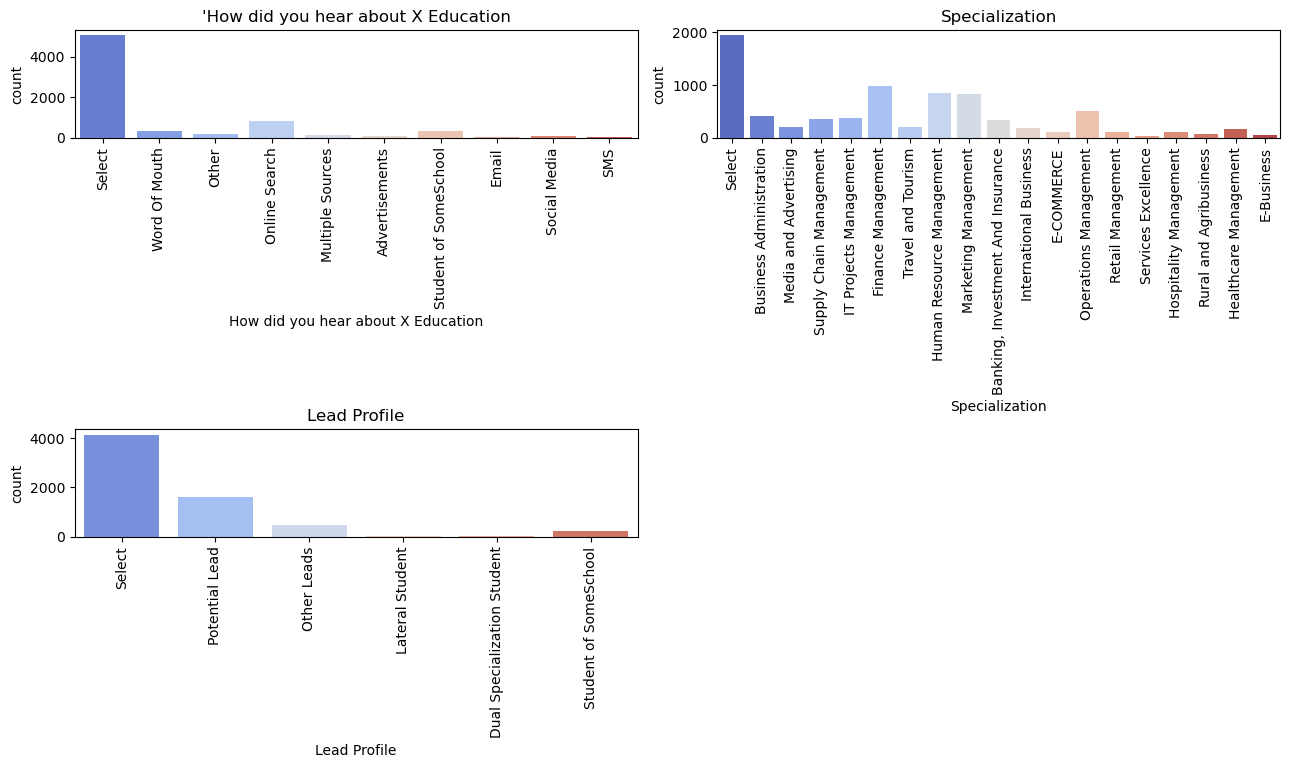

In [17]:
#Visualising the columns that has select values

plt.figure(figsize=(13,6))
plt.subplot(2,2,1)
sns.countplot(x = df['How did you hear about X Education'],palette = "coolwarm")
plt.title("'How did you hear about X Education")
plt.xticks(rotation = 90)


plt.subplot(2,2,2)
sns.countplot(x = df['Specialization'],palette = "coolwarm")
plt.title("Specialization")
plt.xticks(rotation = 90)


plt.subplot(2,2,3)
sns.countplot(x = df['Lead Profile'],palette = "coolwarm")
plt.title("Lead Profile")


plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

### The columns which has the select values are nothing but those who didn't select that option for that particular column

In [18]:
#Dropping the city and country column because it doesn't add any value to the analysis
df.drop(['City'], axis = 1, inplace = True)

In [19]:
df.drop(['Country'], axis = 1, inplace = True)

#### As you can see in the above visulaisation that Lead profile & How did you hear about X Education there are more select values which can be of no use as it has more select values than others

In [20]:
df.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

In [21]:
#We are dropping off these columns because it has unbalanced colums i.e if yes has 8000 then no is having 2 it's better if we remove these kind of columns
df.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [22]:
df.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [23]:
df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)

In [24]:
#Checking te null values and removing them
round(100*df.isnull().mean())

Lead Origin                                0.0
Lead Source                                0.0
Do Not Email                               0.0
Converted                                  0.0
TotalVisits                                1.0
Total Time Spent on Website                0.0
Page Views Per Visit                       1.0
Last Activity                              1.0
Specialization                            16.0
What is your current occupation           29.0
A free copy of Mastering The Interview     0.0
Last Notable Activity                      0.0
dtype: float64

In [25]:
df["What is your current occupation"].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [26]:
 mod=df["What is your current occupation"].mode()[0]
    
df["What is your current occupation"]=df["What is your current occupation"].fillna(mod)

In [27]:
round(100*df.isnull().mean(),2)

Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            15.56
What is your current occupation            0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [28]:
df["Specialization"].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [29]:
mod1=df["Specialization"].mode()[0]
df["Specialization"]=df["Specialization"].fillna(mod1)

In [30]:
round(100*df.isnull().mean(),2)

Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Specialization                            0.00
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [31]:
df["TotalVisits"].value_counts()

TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64

In [32]:
med=df['TotalVisits'].median()
df["TotalVisits"]=df["TotalVisits"].fillna(med)

In [33]:
round(100*df.isnull().mean(),2)

Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               0.00
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Specialization                            0.00
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [34]:
df["Lead Source"].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [35]:
mod1=df["Lead Source"].mode()[0]
df["Lead Source"]=df["Lead Source"].fillna(mod1)

In [36]:
round(100*df.isnull().mean(),2)

Lead Origin                               0.00
Lead Source                               0.00
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               0.00
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Specialization                            0.00
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [37]:
df["Page Views Per Visit"].value_counts()

Page Views Per Visit
0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
2.80        9
14.00       9
4.33        9
2.20        9
2.17        8
1.60        8
3.25        8
2.40        6
13.00       6
12.00       5
1.20        5
1.83        4
3.40        4
2.60        4
1.43        4
15.00       4
1.71        4
1.78        3
4.25        3
16.00       3
4.75        3
5.67        3
1.57        3
1.38        3
3.60        2
1.23        2
1.56        2
5.40        2
2.22        2
7.50        2
1.14        2
5.25        2
2.09        2
3.20        2
3.75        2
5.33        2
2.83        2
2.71        2
1.22        2
2.13        1

In [38]:
med=df['Page Views Per Visit'].median()
df["Page Views Per Visit"]=df["Page Views Per Visit"].fillna(med)

In [39]:
round(100*df.isnull().mean(),2)

Lead Origin                               0.00
Lead Source                               0.00
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               0.00
Total Time Spent on Website               0.00
Page Views Per Visit                      0.00
Last Activity                             1.11
Specialization                            0.00
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [40]:
df["Last Activity"].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [41]:
mod1=df["Last Activity"].mode()[0]
df["Last Activity"]=df["Last Activity"].fillna(mod1)

In [42]:
round(100*df.isnull().mean(),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

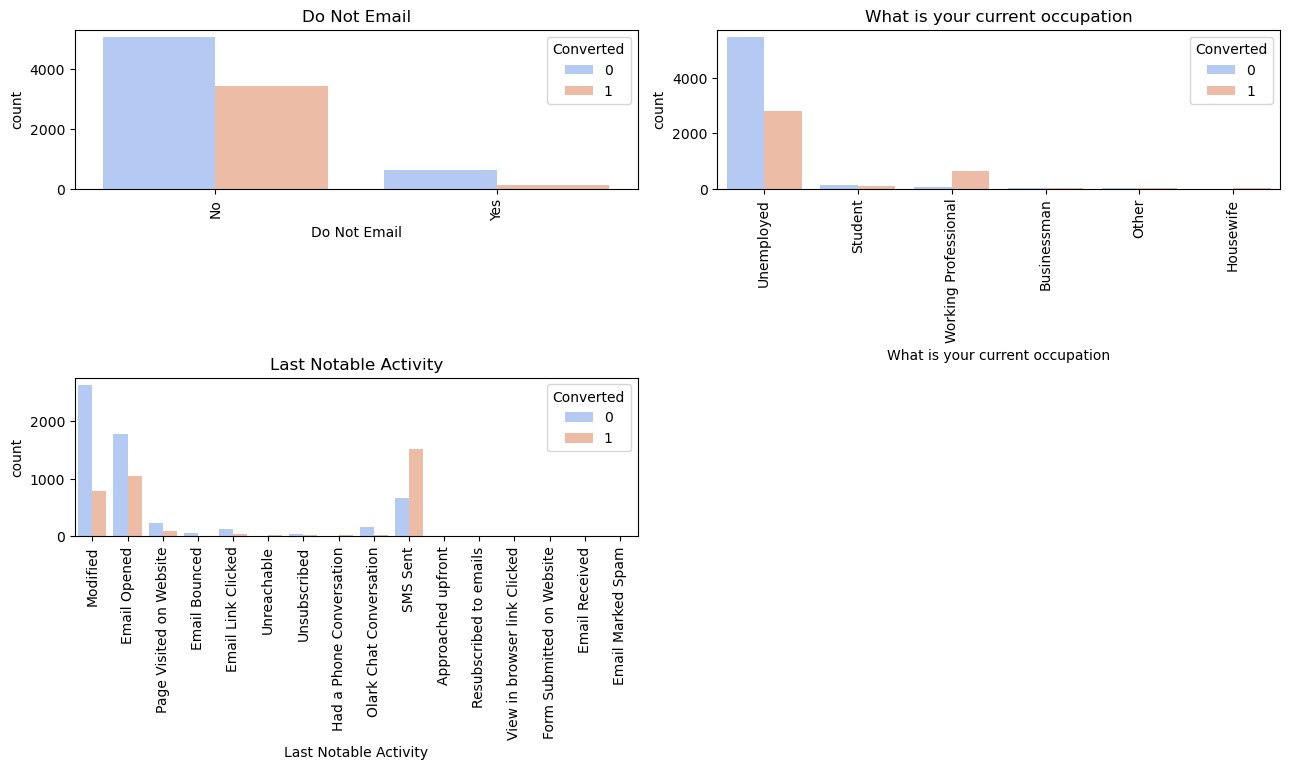

In [43]:
#Visualising for categorical variables
plt.figure(figsize=(13,6))
plt.subplot(2,2,1)
sns.countplot(x = df['Do Not Email'],hue=df['Converted'],palette = "coolwarm")
plt.title("Do Not Email")
plt.xticks(rotation = 90)


plt.subplot(2,2,2)
sns.countplot(x = df['What is your current occupation'],hue=df['Converted'],palette = "coolwarm")
plt.title("What is your current occupation")
plt.xticks(rotation = 90)


plt.subplot(2,2,3)
sns.countplot(x = df['Last Notable Activity'],hue=df["Converted"],palette = "coolwarm")
plt.title("Last Notable Activity")


plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

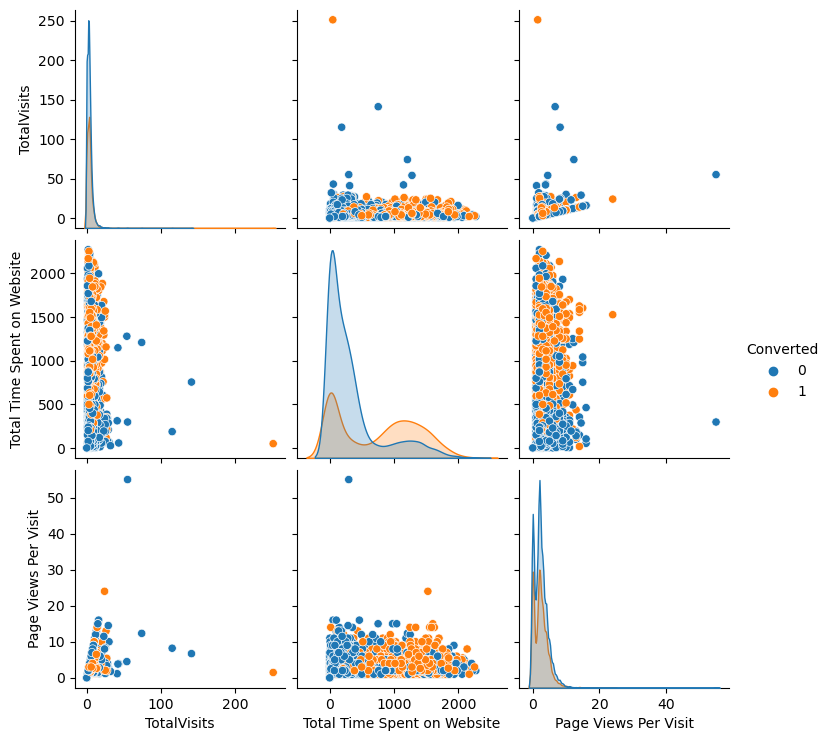

In [44]:
#Visulaising for numerical variables
sns.pairplot(df,hue="Converted")

In [45]:
#Creating dummy variables
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True,dtype=int)

# Add the results to dataframe
df = pd.concat([df, dummy], axis=1)

In [46]:
#Here we are dropping select which has no weightage
dummy_spl = pd.get_dummies(df['Specialization'], prefix = 'Specialization',dtype=int)
dummy_spl = dummy_spl.drop(['Specialization_Select'], axis=1)
df = pd.concat([df, dummy_spl], axis = 1)

In [47]:
#Dropping off the original columns
df = df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)

In [48]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
#Importing the train test split 
from sklearn.model_selection import train_test_split

In [50]:
X = df.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
y=df['Converted']

In [52]:
#dividing into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [53]:
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (6468, 83)
y_train Size (6468,)


In [54]:
#Importing the min max scaler
from sklearn.preprocessing import MinMaxScaler

In [55]:
#importing the min max scaler to scale between 0 and 1
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
1871,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6795,0.015936,0.214349,0.024182,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3516,0.019920,0.046655,0.045455,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8105,0.019920,0.541373,0.090909,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3934,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
#Checking whether the values are between 0 and 1
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440,0.528788,0.077706,0.005952,0.000108,0.275216,0.005952,0.314286,0.000216,0.000108,0.189935,0.124892,0.000108,0.000216,0.057792,0.013528,0.000216,0.000108,0.015368,0.000649,0.000108,0.000541,0.000108,0.000108,0.000108,0.07943

In [57]:
#Checking the conversion rate
converted = (sum(df['Converted'])/len(df['Converted'].index))*100
converted

38.53896103896104

In [58]:
#Importing the necessary models for regression
import statsmodels.api as sm

In [59]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [60]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [61]:
rfe.support_

array([ True,  True, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False,  True, False,  True,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [62]:
#Listing out the columns
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 56),
 ('Lead Origin_Quick Add Form', False, 47),
 ('Lead Source_Direct Traffic', False, 40),
 ('Lead Source_Facebook', False, 39),
 ('Lead Source_Google', False, 44),
 ('Lead Source_Live Chat', False, 54),
 ('Lead Source_NC_EDM', False, 29),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 43),
 ('Lead Source_Pay per Click Ads', False, 58),
 ('Lead Source_Press_Release', False, 52),
 ('Lead Source_Reference', False, 51),
 ('Lead Source_Referral Sites', False, 42),
 ('Lead Source_Social Media', False, 27),
 ('Lead Source_WeLearn', False, 37),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 60),
 ('Lead Source_blog', False, 45),
 ('Lead Source_google', False, 41),
 ('Lead Source_testone', False, 68),
 ('

In [63]:
#Passing it into a col variable
col = X_train.columns[rfe.support_]

In [64]:
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [65]:
X_train = X_train[col]

In [66]:
#Model1
X_train_sm = sm.add_constant(X_train)
lg1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = lg1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2694.6
Date:                Mon, 17 Jun 2024   Deviance:                       5389.2
Time:                        21:23:05   Pearson chi2:                 7.15e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3911
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0099      0.088    -11.522      0.000      -1.182      -0.838
TotalVisits                                              7.5752      2.059      3.679      0.000       3.540      11.611
Total Time Spent on Website                              4.5376      0.163     27.765      0.000       4.217       4.858
Lead Origin_Lead Add Form                                3.9030      0.193     20.210      0.000       3.524       4.282
Lead Source_Olark Chat                                   1.2845      0.108     11.898      0.000       1.073       1.496
Lead Source_Welingak Website                             2.0232      0.746      2.711      0.007       0.561       3.486
Do Not Email_Yes                                        -1.6417      0.170     -9.665      0.000      -1.975      -1.309
Last Activity_Olark Chat Conversation                   -1.0752      0.192     -5.596      0.000      -1.452      -0.699
What is your current occupation_Housewife               23.0116   1.37e+04      0.002      0.999   -2.67e+04    2.68e+04
What is your current occupation_Working Professional     2.7670      0.187     14.833      0.000       2.401       3.133
Last Notable Activity_Email Link Clicked                -1.9176      0.272     -7.058      0.000      -2.450      -1.385
Last Notable Activity_Email Opened                      -1.3337      0.087    -15.366      0.000      -1.504      -1.164
Last Notable Activity_Had a Phone Conversation           2.0272      1.098      1.845      0.065      -0.126       4.180
Last Notable Activity_Modified                          -1.8422      0.095    -19.347      0.000      -2.029      -1.656
Last Notable Activity_Olark Chat Conversation           -1.6354      0.376     -4.348      0.000      -2.373      -0.898
Last Notable Activity_Page Visited on Website           -1.7691      0.201     -8.815      0.000      -2.162      -1.376
========================================================================================================================
"""

In [67]:
#importing the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
def VIF(df):
    vif=pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [69]:
VIF(X_train)

,Features,VIF
6,Last Activity_Olark Chat Conversation,1.89
12,Last Notable Activity_Modified,1.85
1,Total Time Spent on Website,1.65
3,Lead Source_Olark Chat,1.60
0,TotalVisits,1.58
10,Last Notable Activity_Email Opened,1.45
2,Lead Origin_Lead Add Form,1.39
13,Last Notable Activity_Olark Chat Conversation,1.33
4,Lead Source_Welingak Website,1.24
8,What is your current occupation_Working Profes...,1.17


In [70]:
#Dropping this because of High p value
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [71]:
#Model2
X_train_sm = sm.add_constant(X_train)
lg2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = lg2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2702.2
Date:                Mon, 17 Jun 2024   Deviance:                       5404.3
Time:                        21:23:05   Pearson chi2:                 7.18e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3897
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0063      0.088    -11.494      0.000      -1.178      -0.835
TotalVisits                                              7.4919      2.052      3.650      0.000       3.469      11.515
Total Time Spent on Website                              4.5333      0.163     27.776      0.000       4.213       4.853
Lead Origin_Lead Add Form                                3.9178      0.193     20.331      0.000       3.540       4.296
Lead Source_Olark Chat                                   1.2766      0.108     11.844      0.000       1.065       1.488
Lead Source_Welingak Website                             1.9995      0.746      2.680      0.007       0.537       3.462
Do Not Email_Yes                                        -1.6454      0.170     -9.689      0.000      -1.978      -1.313
Last Activity_Olark Chat Conversation                   -1.0804      0.192     -5.626      0.000      -1.457      -0.704
What is your current occupation_Working Professional     2.7605      0.187     14.801      0.000       2.395       3.126
Last Notable Activity_Email Link Clicked                -1.8989      0.269     -7.055      0.000      -2.426      -1.371
Last Notable Activity_Email Opened                      -1.3272      0.087    -15.306      0.000      -1.497      -1.157
Last Notable Activity_Had a Phone Conversation           2.0266      1.098      1.845      0.065      -0.126       4.180
Last Notable Activity_Modified                          -1.8339      0.095    -19.290      0.000      -2.020      -1.648
Last Notable Activity_Olark Chat Conversation           -1.6264      0.376     -4.325      0.000      -2.363      -0.889
Last Notable Activity_Page Visited on Website           -1.7666      0.201     -8.806      0.000      -2.160      -1.373
========================================================================================================================
"""

In [72]:
VIF(X_train)

,Features,VIF
6,Last Activity_Olark Chat Conversation,1.89
11,Last Notable Activity_Modified,1.85
1,Total Time Spent on Website,1.65
3,Lead Source_Olark Chat,1.60
0,TotalVisits,1.58
9,Last Notable Activity_Email Opened,1.45
2,Lead Origin_Lead Add Form,1.39
12,Last Notable Activity_Olark Chat Conversation,1.33
4,Lead Source_Welingak Website,1.23
7,What is your current occupation_Working Profes...,1.16


In [73]:
#Dropping this because of High p value
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [74]:
#Model3
X_train_sm = sm.add_constant(X_train)
lg3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = lg3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2704.6
Date:                Mon, 17 Jun 2024   Deviance:                       5409.2
Time:                        21:23:05   Pearson chi2:                 7.18e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3892
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9938      0.087    -11.376      0.000      -1.165      -0.823
TotalVisits                                              7.6369      2.057      3.713      0.000       3.605      11.668
Total Time Spent on Website                              4.5241      0.163     27.754      0.000       4.205       4.844
Lead Origin_Lead Add Form                                3.9151      0.193     20.312      0.000       3.537       4.293
Lead Source_Olark Chat                                   1.2725      0.108     11.807      0.000       1.061       1.484
Lead Source_Welingak Website                             1.9995      0.746      2.680      0.007       0.537       3.462
Do Not Email_Yes                                        -1.6528      0.170     -9.731      0.000      -1.986      -1.320
Last Activity_Olark Chat Conversation                   -1.0792      0.192     -5.620      0.000      -1.456      -0.703
What is your current occupation_Working Professional     2.7591      0.186     14.795      0.000       2.394       3.125
Last Notable Activity_Email Link Clicked                -1.9097      0.269     -7.098      0.000      -2.437      -1.382
Last Notable Activity_Email Opened                      -1.3386      0.087    -15.463      0.000      -1.508      -1.169
Last Notable Activity_Modified                          -1.8444      0.095    -19.424      0.000      -2.031      -1.658
Last Notable Activity_Olark Chat Conversation           -1.6369      0.376     -4.354      0.000      -2.374      -0.900
Last Notable Activity_Page Visited on Website           -1.7810      0.201     -8.882      0.000      -2.174      -1.388
========================================================================================================================
"""

In [75]:
VIF(X_train)

,Features,VIF
6,Last Activity_Olark Chat Conversation,1.89
10,Last Notable Activity_Modified,1.85
1,Total Time Spent on Website,1.65
3,Lead Source_Olark Chat,1.60
0,TotalVisits,1.58
9,Last Notable Activity_Email Opened,1.45
2,Lead Origin_Lead Add Form,1.39
11,Last Notable Activity_Olark Chat Conversation,1.33
4,Lead Source_Welingak Website,1.23
7,What is your current occupation_Working Profes...,1.16


#### Now the VIF and p values seems to be below the destined values, Lets us bulid the model

In [76]:
#Using predict
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]


1871    0.257328
6795    0.224259
3516    0.332543
8105    0.833068
3934    0.172830
4844    0.992444
3297    0.124531
8071    0.990109
987     0.234159
7423    0.901122
dtype: float64

In [77]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.25732785, 0.22425913, 0.33254314, 0.83306803, 0.17282973,
       0.99244354, 0.12453056, 0.99010883, 0.23415909, 0.90112196])

In [78]:
# Creating a data frame for conversion values

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.257328
1,0,0.224259
2,0,0.332543
3,0,0.833068
4,0,0.172830


In [79]:
#Creating a predicted variable
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()


,Converted,Conversion_Prob,Predicted
0,0,0.257328,0
1,0,0.224259,0
2,0,0.332543,0
3,0,0.833068,1
4,0,0.172830,0


In [80]:
#Importing libraires for precision and recall and accuracy
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix

In [81]:
#Creating a confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3548  454]
 [ 751 1715]]


In [82]:
# Checking the accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8136982065553494


In [83]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [84]:
#Senisitivty
TP/(TP+FN)

0.6954582319545823

In [85]:
#Specificity
TN/(TN+FP)

0.8865567216391804

In [86]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [87]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                    y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate=False)

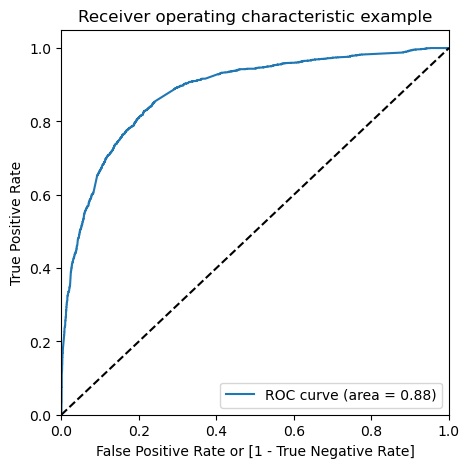

In [88]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### The area under Roc is 0.88 which is good

In [89]:
#Creating columns with different probablity cutoff
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.257328,0,1,1,1,0,0,0,0,0,0,0
1,0,0.224259,0,1,1,1,0,0,0,0,0,0,0
2,0,0.332543,0,1,1,1,1,0,0,0,0,0,0
3,0,0.833068,1,1,1,1,1,1,1,1,1,1,0
4,0,0.172830,0,1,1,0,0,0,0,0,0,0,0


In [90]:
# Let's create a dataframe to see the values of 
at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.593383  0.965937  0.363818
0.2   0.2  0.760204  0.907137  0.669665
0.3   0.3  0.798237  0.836577  0.774613
0.4   0.4  0.810606  0.766018  0.838081
0.5   0.5  0.813698  0.695458  0.886557
0.6   0.6  0.796846  0.587186  0.926037
0.7   0.7  0.782468  0.512976  0.948526
0.8   0.8  0.758503  0.410787  0.972764
0.9   0.9  0.715677  0.273317  0.988256


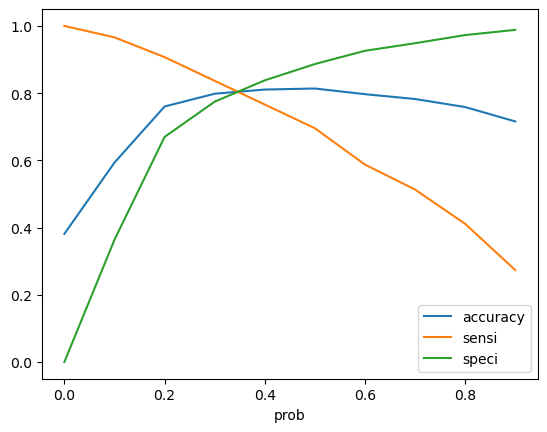

In [91]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### 0.37 seems to be the cutoff

In [92]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.257328,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.224259,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.332543,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.833068,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.172830,0,1,1,0,0,0,0,0,0,0,0,0


In [93]:
# checking the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8061224489795918

In [94]:
#Creating the confuse matrix again to see whether that is a optimal cutoff
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3278,  724],
       [ 530, 1936]], dtype=int64)

In [95]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [96]:
#Sensitivity
TP/(TP+FN)

0.7850770478507705

In [97]:
# Specificity
TN/(TN+FP)

0.8190904547726137

## Making predicitions on test data set

In [98]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] =  scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [99]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
4269,0.031873,0.444982,0,0,0,0,0,0,0,0,0,0,0,0,0
2376,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0
7766,0.019920,0.025968,0,0,0,0,0,0,1,0,0,0,0,0,0
9199,0.000000,0.000000,0,1,0,0,1,0,0,0,0,0,1,0,0
4359,0.000000,0.000000,1,0,0,0,0,0,0,0,1,0,0,0,0


In [100]:
X_test_sm = sm.add_constant(X_test[col])

In [101]:
#Dropping the same columns from X_test
X_test.drop([ 'What is your current occupation_Housewife',
                     'Last Notable Activity_Had a Phone Conversation'], axis=1, 
                                inplace = True)

In [102]:
y_test_pred = res.predict(sm.add_constant(X_test))

In [103]:
y_test_pred[:10]

4269    0.779496
2376    0.948888
7766    0.884409
9199    0.066307
4359    0.829578
9186    0.600460
1631    0.459288
8963    0.153486
8007    0.112847
5324    0.358029
dtype: float64

In [104]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [105]:
y_pred_1.head()

,0
4269,0.779496
2376,0.948888
7766,0.884409
9199,0.066307
4359,0.829578


In [106]:
y_test_df = pd.DataFrame(y_test)

In [107]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [108]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [109]:
y_pred_final.head()

,Converted,0
0,1,0.779496
1,1,0.948888
2,1,0.884409
3,0,0.066307
4,1,0.829578


In [110]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [111]:
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.779496
1,1,0.948888
2,1,0.884409
3,0,0.066307
4,1,0.829578


In [112]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [113]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.779496,1
1,1,0.948888,1
2,1,0.884409,1
3,0,0.066307,0
4,1,0.829578,1


In [114]:
#Checking Accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8113275613275613

In [115]:
#Creating confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1390,  287],
       [ 236,  859]], dtype=int64)

In [116]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [117]:
#Sensitivity
TP/(TP+FN)

0.7844748858447489

In [118]:
#Specificity
TN/(TN+FP)

0.8288610614192009

### Precision and recall

In [119]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3548,  454],
       [ 751, 1715]], dtype=int64)

In [120]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [121]:
#Precision
TP/(TP+FP)

0.7906869525126786

In [122]:
#Recall
TP / (TP + FN)

0.6954582319545823

In [123]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

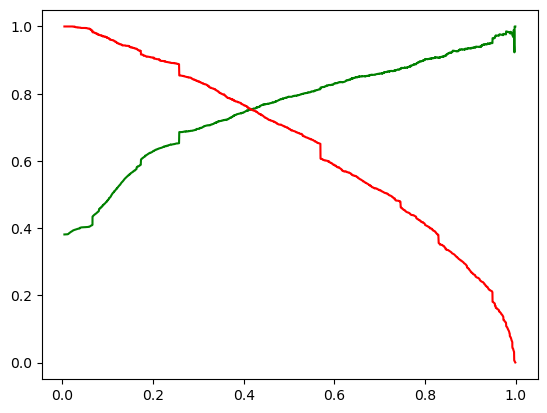

In [124]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [125]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.257328,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.224259,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.332543,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.833068,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.172830,0,1,1,0,0,0,0,0,0,0,0,0


In [126]:
#Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8115337043908473

In [127]:
#Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3381,  621],
       [ 598, 1868]], dtype=int64)

In [128]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [129]:
#Preision
TP/(TP+FP)

0.7505022097227803

In [130]:
#Recall
TP/(TP+FN)

0.7575020275750203

#### Making prediction on test set

In [131]:
y_test_pred = res.predict(sm.add_constant(X_test))

In [132]:
y_test_pred[:10]

4269    0.779496
2376    0.948888
7766    0.884409
9199    0.066307
4359    0.829578
9186    0.600460
1631    0.459288
8963    0.153486
8007    0.112847
5324    0.358029
dtype: float64

In [133]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [134]:
y_pred_1.head()

,0
4269,0.779496
2376,0.948888
7766,0.884409
9199,0.066307
4359,0.829578


In [135]:
y_test_df = pd.DataFrame(y_test)

In [136]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [137]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [138]:
y_pred_final.head()

,Converted,0
0,1,0.779496
1,1,0.948888
2,1,0.884409
3,0,0.066307
4,1,0.829578


In [139]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [140]:
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.779496
1,1,0.948888
2,1,0.884409
3,0,0.066307
4,1,0.829578


In [141]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)

In [142]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.779496,1
1,1,0.948888,1
2,1,0.884409,1
3,0,0.066307,0
4,1,0.829578,1


In [143]:
#Accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8138528138528138

In [144]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1434,  243],
       [ 273,  822]], dtype=int64)

In [145]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [146]:
#Precision
TP/(TP+FP)

0.7718309859154929

In [147]:
#Recall
TP/(TP+FN)

0.7506849315068493